In [34]:
import pandas as pd
import numpy as np


In [35]:
df = pd.read_csv(r'C:\Users\ISMAIL\Downloads\telecom_customer_churn.csv (1)\telecom_customer_churn.csv')

In [36]:
# View the first few rows of the dataset
df.head()



,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [37]:
df.shape


(7043, 38)

In [38]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [39]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [40]:
# Identify duplicates in the dataset
df.duplicated().sum()

0

In [41]:
# Identify missing values in the dataset
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [42]:
#Since there are 3877 missing values for the "Offer" column, it might not be appropriate to remove the entire column.
#One option is to fill the missing values with a specific category or value, such as "No Offer" or "Unknown". we can use the fillna() method for this.

df['Offer'].fillna('No Offer', inplace=True)


In [43]:
df.drop('Multiple Lines', axis=1, inplace=True)
df.drop('Avg Monthly Long Distance Charges', axis=1, inplace=True)

In [44]:
# Fill missing values with "No Internet" for Internet-related columns
internet_cols = ['Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan',
                 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
df[internet_cols] = df[internet_cols].fillna('Unknown')

In [45]:
#I would be drpping the churn category and churn reason columns ismply because the amount of missing data in both columns is of such great magnitude and filling it with data based on assumptions might create a bias in our analysis in the future
df.drop(['Churn Category', 'Churn Reason', 'Avg Monthly GB Download'], axis=1, inplace=True)


In [46]:
df.dtypes

Customer ID                     object
Gender                          object
Age                              int64
Married                         object
Number of Dependents             int64
City                            object
Zip Code                         int64
Latitude                       float64
Longitude                      float64
Number of Referrals              int64
Tenure in Months                 int64
Offer                           object
Phone Service                   object
Internet Service                object
Internet Type                   object
Online Security                 object
Online Backup                   object
Device Protection Plan          object
Premium Tech Support            object
Streaming TV                    object
Streaming Movies                object
Streaming Music                 object
Unlimited Data                  object
Contract                        object
Paperless Billing               object
Payment Method           

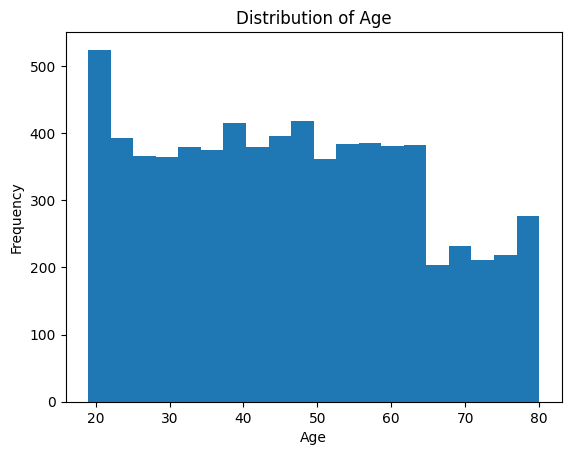

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


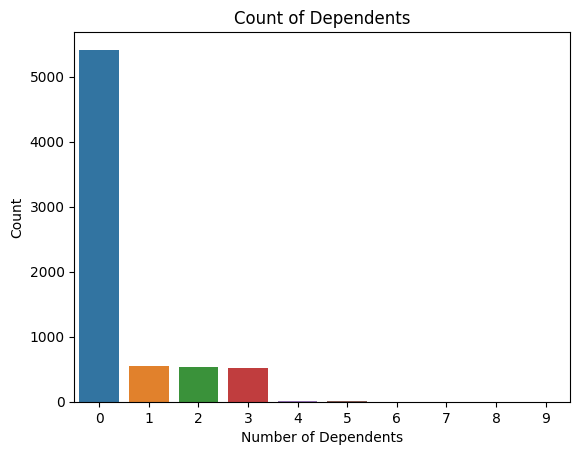

In [48]:


sns.countplot(data=df, x='Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Count of Dependents')
plt.show()


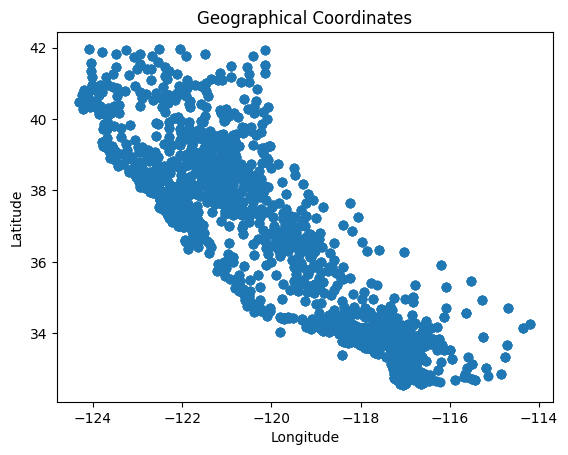

In [49]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Coordinates')
plt.show()


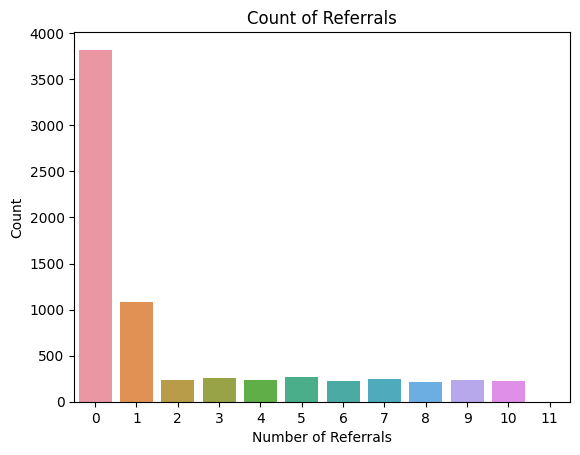

In [50]:
sns.countplot(data=df, x='Number of Referrals')
plt.xlabel('Number of Referrals')
plt.ylabel('Count')
plt.title('Count of Referrals')
plt.show()


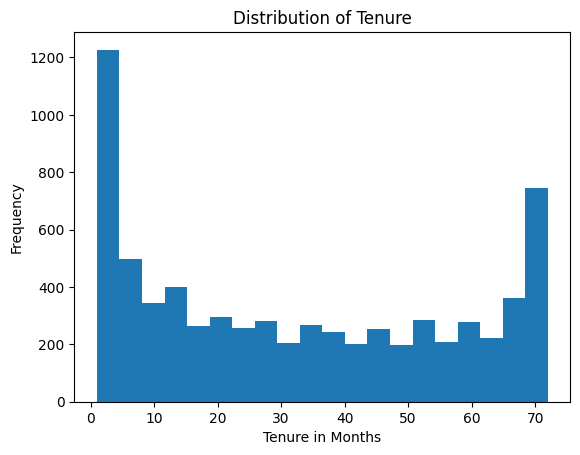

In [51]:
plt.hist(df['Tenure in Months'], bins=20)
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()


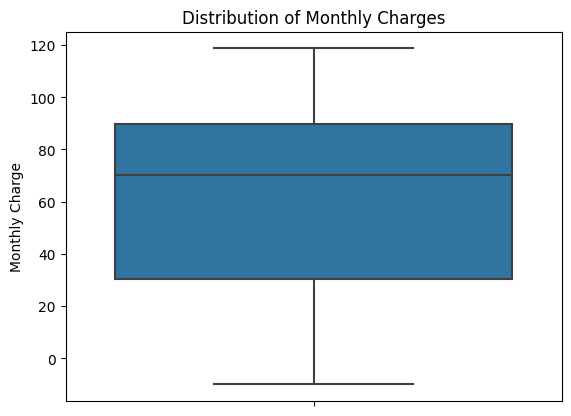

In [52]:
sns.boxplot(data=df, y='Monthly Charge')
plt.ylabel('Monthly Charge')
plt.title('Distribution of Monthly Charges')
plt.show()


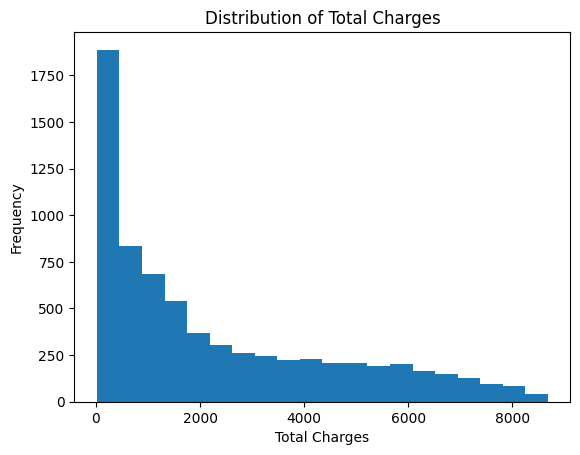

In [53]:
plt.hist(df['Total Charges'], bins=20)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')
plt.show()


In [55]:
df.to_csv('C:/Users/ISMAIL/OneDrive/Documents/data science projects/cleanedandanalyzed_dataset.csv', index=False)
